## Задача 1 - Обработка данных спектров ##

Новиков Евгений 120м

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


def is_digit(string):
    if string.isdigit():
       return True
    else:
        try:
            float(string)
            return True
        except ValueError:
            return False

In [2]:
sns.set_theme(style="darkgrid")

### Загрузка данных эталонов ###

In [3]:
file_1 = open('CalibrKUThAl_mdb.mid', 'r')
list_1 = {}

for i, line in enumerate(file_1):
    list_1[i] = line
    
file_1.close()

**Эталон K**

In [4]:
Standard_K = dict()
for key in range(15,29,4):
    Standard_K[key] = list_1[key][34:] # заголовок - 34 символа
for key in range(31,43,2):
    Standard_K[key] = list_1[key][34:]
    
for key in Standard_K.keys():
    Standard_K[key] = Standard_K[key].split(' ')
    Standard_K[key] = np.array([float(i) for i in Standard_K[key] if is_digit(i)])

In [5]:
#Standard_K # 0.58 - 1.03 K 2.7 %, первый ключ - 0.58, далее с шагом 0.05 (и так для всех трех спектров)

In [6]:
# Standard_K.clear()

**Эталон Th**

In [7]:
Standard_Th = dict()
for key in range(51,68,2):
    Standard_Th[key] = list_1[key][34:]
    
for key in Standard_Th.keys():
    Standard_Th[key] = Standard_Th[key].split(' ')
    Standard_Th[key] = np.array([float(i) for i in Standard_Th[key] if is_digit(i)])    

In [8]:
#Standard_Th # 1.28 - 1.68 Th 183 ppm

In [9]:
# Standard_Th.clear()

**Эталон U**

In [10]:
Standard_U = dict() 
for key in range(79,96,2):
    Standard_U[key] = list_1[key][34:]
    
for key in Standard_U.keys():
    Standard_U[key] = Standard_U[key].split(' ')
    Standard_U[key] = np.array([float(i) for i in Standard_U[key] if is_digit(i)])    

In [11]:
#Standard_U # 1.98 - 2.38 U 60 ppm

In [12]:
# Standard_U.clear()

**Чтение шума**

In [13]:
Standard_Fon = dict() 
for key in range(105,159,2):
    Standard_Fon[key] = list_1[key][34:]
    
for key in Standard_Fon.keys():
    Standard_Fon[key] = Standard_Fon[key].split(' ')
    Standard_Fon[key] = np.array([float(i) for i in Standard_Fon[key] if is_digit(i)])

In [14]:
#Standard_Fon # 2.63 - 4.00

In [15]:
# Standard_Fon.clear()

### Обработка и получение общего спектра для каждого образца ###

Далее - суммирование спектора для каждого элемента для получения общего кумулятивного спектра

**Суммирование спектра Калия**

In [16]:
sum_K = np.zeros(1024)
for i in Standard_K.values():
    sum_K += i
    
sum_K = sum_K/10

Text(0.5, 1.0, 'Спектр Калия')

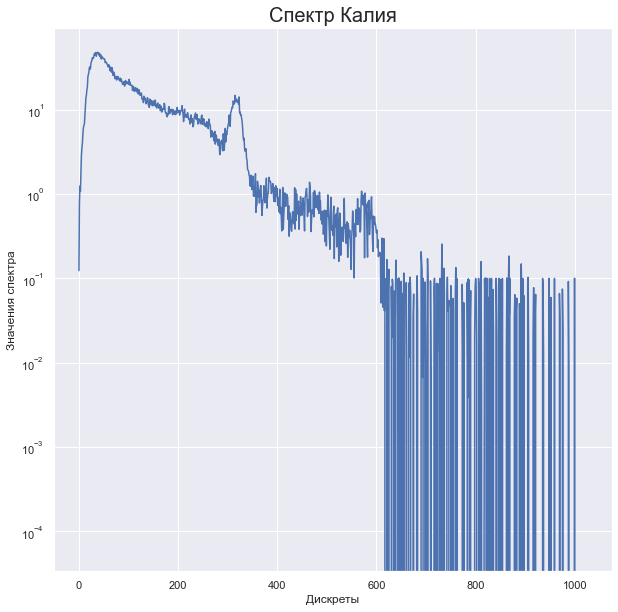

In [17]:
plot_K = plt.semilogy(sum_K)
plt.xlabel('Дискреты')
plt.ylabel('Значения спектра')
plt.title('Спектр Калия', fontsize = 20)

**Суммирование спектра Тория**

In [18]:
sum_Th = np.zeros(1024)
for i in Standard_Th.values():
    sum_Th += i
    
sum_Th = sum_Th/9

Text(0.5, 1.0, 'Спектр Тория')

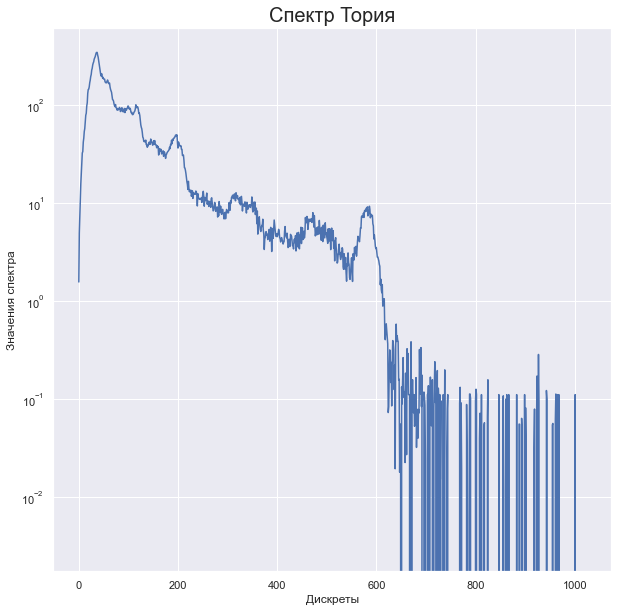

In [19]:
plot_Th = plt.semilogy(sum_Th)
plt.xlabel('Дискреты')
plt.ylabel('Значения спектра')
plt.title('Спектр Тория', fontsize = 20)

**Суммирование спектра Урана**

In [20]:
sum_U = np.zeros(1024)
for i in Standard_U.values():
    sum_U += i
    
sum_U = sum_U/9

Text(0.5, 1.0, 'Спектр Урана')

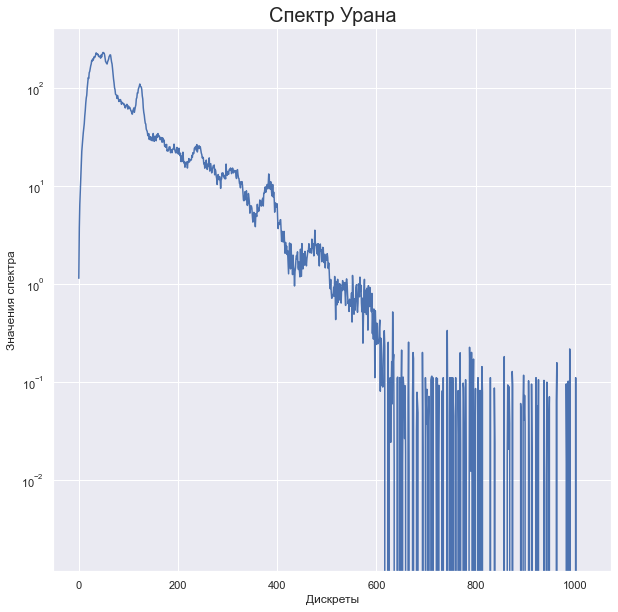

In [21]:
plot_U = plt.semilogy(sum_U)
plt.xlabel('Дискреты')
plt.ylabel('Значения спектра')
plt.title('Спектр Урана', fontsize = 20)

**Суммирование спектра фона**

In [22]:
sum_Fon = np.zeros(1024)
for i in Standard_Fon.values():
    sum_Fon += i
    
sum_Fon = sum_Fon/27

Text(0.5, 1.0, 'Фон - для удаления')

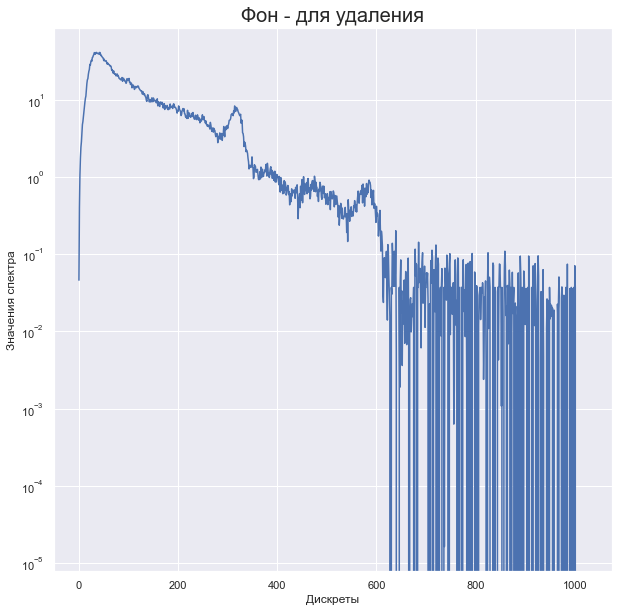

In [23]:
plt.semilogy(sum_Fon)
plt.xlabel('Дискреты')
plt.ylabel('Значения спектра')
plt.title('Фон - для удаления', fontsize = 20)

Сначала выведу все спектры в логарифмическом масштабе без вычета фона.

<center><b> Все спектры </b></center>

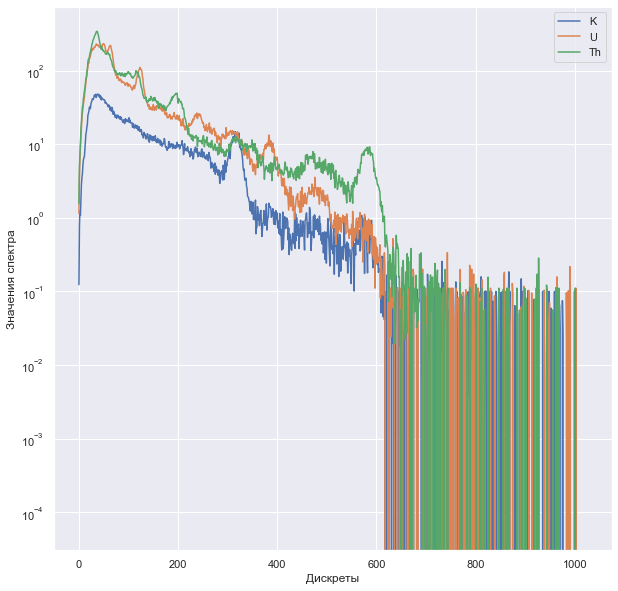

In [24]:
k = plt.semilogy(sum_K, label = 'K') 
u = plt.semilogy(sum_U, label = 'U')
th = plt.semilogy(sum_Th, label = 'Th')
#fon = plt.plot(sum_Fon, label = 'Fon')
plt.legend()
plt.xlabel('Дискреты');
plt.ylabel('Значения спектра');

Для разнообразия можно вывести все спектры в обычном масштабе

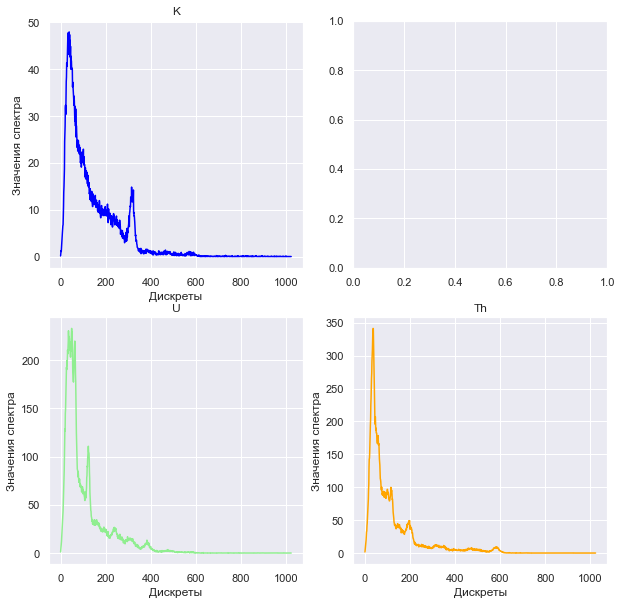

In [25]:
fig1, axes = plt.subplots(nrows = 2, ncols = 2)

axes[0,0].set(title='K')
axes[1,0].set(title='U')
axes[1,1].set(title='Th')
#axes[0,1].set(title='Fon')

axes[0,0].plot(sum_K, color = 'blue')
axes[1,0].plot(sum_U, color = 'lightgreen')
axes[1,1].plot(sum_Th, color = 'orange')
#axes[0,1].plot(sum_Fon, color = 'brown')

axes[0,0].set_xlabel('Дискреты');
axes[0,0].set_ylabel('Значения спектра');
axes[1,0].set_xlabel('Дискреты');
axes[1,0].set_ylabel('Значения спектра');
axes[1,1].set_xlabel('Дискреты');
axes[1,1].set_ylabel('Значения спектра');

### Обработка СГК ###

**Чтение файла**

0.53 - 2.27

0.93 - 2.33 - нужный интервал

In [26]:
file_2 = open('quest_mdb.mid')
list_2 = {}

for i, line in enumerate(file_2):
    list_2[i] = line
    
file_2.close()   

In [27]:
#list_2 
# 3 7 11 + 4 under    15 19 23 27 31 до глубины 1.28
# продолжение с глубины 1.33 дискреты - 33 35 37 и до 55

In [28]:
S_ = dict()
for key in range(3, 32, 4):
    S_[key] = list_2[key][34:] # заголовок - 34 символа

for key in range(33, 74, 2):
    S_[key] = list_2[key][34:]

In [29]:
# S_.clear()

Далее необходимо распарсить данные для удобного чтения

In [30]:
for key in S_.keys():
    S_[key] = S_[key].split()
    S_[key] = np.array([float(i) for i in S_[key] if is_digit(i)])
    
space_right = [] 
i = 0.93
while (i < 2.34):
    space_right.append(i)
    i += 0.05
    i = round(i,2)
    
mas_right = {key:value for key, value in zip(space_right, S_.values())} # правильно пронумеровать ключи

for key, value in mas_right.items(): # удобный вывод каждого спектра
    print (key, value)

0.93 [0.41323773 1.03254275 2.46751241 ... 0.         0.         0.        ]
0.98 [0.41323773 0.58676227 0.95664644 ... 0.         0.         0.        ]
1.03 [0.82647546 3.84820739 4.76028682 ... 0.         0.         0.        ]
1.08 [1.23971318 4.43496966 5.23861004 ... 0.         0.         0.        ]
1.13 [0.82647546 3.40242692 8.03265306 ... 0.         0.         0.        ]
1.18 [0.         0.89156095 7.36999448 ... 0.         0.         0.        ]
1.23 [0.82647546 2.51086597 5.48924435 ... 0.         0.         0.        ]
1.28 [2.47942637 6.19525648 8.58687259 ... 0.         0.         0.        ]
1.33 [1.65295091 4.57595146 6.5976834  ... 0.         0.         0.        ]
1.38 [1.95311638 5.27578599 5.16271373 ... 0.         0.         0.        ]
1.43 [1.23971318 3.09762824 5.48924435 ... 0.         0.         0.        ]
1.48 [1.23971318 3.54340871 5.08681743 ... 0.         0.         0.        ]
1.53 [0.41323773 3.70722559 5.31450634 ... 0.         0.         0.        ]

**ВЫЧИТАНИЕ ФОНА**

In [31]:
for value in mas_right.values():
    value -= sum_Fon # вычесть фон

Далее - можно сформировать матрицу и заняться определением конфентрации. Будет использоваться классический Метод наименьших квадратов.

In [32]:
sums = np.array([sum_K, sum_U, sum_Th]) # формирование матрицы

solution = [] # найти решение методом МНК
for key, value in mas_right.items():
    solution.append(linalg.lstsq(sums.T, value.T)[0])

# Перезапись в словарь для удобства
solution_0 = {}
for key, arr in zip(space_right, solution):
    solution_0[key] = arr

Высчитывание концентрации

In [33]:
for value in solution_0.values(): 
    value[0] = 0.027 * value[0]
    value[1] = 0.000183 * value[1]
    value[2] = 0.000060 * value[2]
#K, U, Th

K_s = []
U_s = []
Th_s = []
for i in solution_0.values():
    K_s.append(i[0])
    U_s.append(i[1])
    Th_s.append(i[2])

# теперь последовательность выглядит так 
for key,value in solution_0.items():
    print (key,value)

0.93 [3.66863233e-03 3.65588372e-06 3.19852298e-06]
0.98 [2.24904374e-03 1.53710937e-06 1.36063108e-05]
1.03 [-1.17300512e-02  1.46695032e-05  3.08601693e-05]
1.08 [-1.86482674e-02  2.86582704e-05  4.22541093e-05]
1.13 [-1.83053768e-02  7.18347222e-05  3.33384056e-05]
1.18 [-1.78755641e-02  1.47163651e-04  1.09736076e-05]
1.23 [-1.83660679e-02  1.77389405e-04  1.48005310e-06]
1.28 [-1.29831583e-02  1.65121308e-04  2.28716983e-06]
1.33 [-1.74484842e-02  1.45681352e-04  1.29894634e-05]
1.38 [-2.26026204e-02  8.60344624e-05  3.04520863e-05]
1.43 [-1.80155827e-02  2.32026089e-05  4.39394976e-05]
1.48 [-9.86003429e-03  7.67156249e-06  3.27094954e-05]
1.53 [ 3.16560426e-03 -3.36597658e-06  1.49821674e-05]
1.58 [ 1.03488857e-02 -9.15036612e-07  2.62604218e-06]
1.63 [ 5.69468584e-03 -3.48484665e-06  2.51380924e-06]
1.68 [ 8.67339584e-03  1.80727784e-06 -3.59734730e-07]
1.73 [ 7.36197476e-03  6.50686467e-06 -3.11393838e-07]
1.78 [ 3.40819243e-03  3.06454812e-05 -1.01034149e-06]
1.83 [-3.5367641

In [34]:
res = []
for key,value in solution_0.items():
    if (max(value) == value[0]):
        res.append('K')
    elif (max(value) == value[1]):
        res.append('U')
    else:
        res.append('Th')
# решение есть, однако оно находится не в тех дискретах, поэтому надо правльно разбить последовательность записи

**Разделение на блоки и вывод итогового решения**

In [35]:
blocks = {}
for key, value in solution_0.items():
    key = round(key, 3)
    if ((key * 100) % 2 != 0) and (key < 2.32):
        blocks[key] = solution_0[key] + solution_0[round(key + 0.05, 3)]

In [36]:
blocks # получение правильных блоков

{0.93: array([5.91767607e-03, 5.19299309e-06, 1.68048338e-05]),
 1.03: array([-3.03783186e-02,  4.33277736e-05,  7.31142786e-05]),
 1.13: array([-3.61809409e-02,  2.18998374e-04,  4.43120132e-05]),
 1.23: array([-3.13492263e-02,  3.42510713e-04,  3.76722293e-06]),
 1.33: array([-4.00511046e-02,  2.31715815e-04,  4.34415497e-05]),
 1.43: array([-2.78756170e-02,  3.08741714e-05,  7.66489930e-05]),
 1.53: array([ 1.35144899e-02, -4.28101319e-06,  1.76082095e-05]),
 1.63: array([ 1.43680817e-02, -1.67756881e-06,  2.15407451e-06]),
 1.73: array([ 1.07701672e-02,  3.71523459e-05, -1.32173533e-06]),
 1.83: array([-1.23802768e-02,  1.81409256e-04,  5.72096060e-06]),
 1.93: array([-3.70401294e-02,  1.62414809e-04,  5.83772251e-05]),
 2.03: array([-3.98763025e-02,  8.99382916e-06,  1.17446638e-04]),
 2.13: array([-3.01230188e-02, -2.76822473e-05,  1.22799872e-04]),
 2.18: array([-3.46896248e-02, -2.88490795e-05,  1.21288525e-04]),
 2.23: array([-3.44925949e-02, -1.63058980e-05,  1.07707422e-04])

И теперь уже можно определить по максимум концентрации в дискрете доминирующий в нем элемент

In [37]:
res_in_blocks = []
for key,value in blocks.items():
    if (max(value) == value[0]):
        res_in_blocks.append('K')
    elif (max(value) == value[1]):
        res_in_blocks.append('U')
    else:
        res_in_blocks.append('Th')
print('Итоговая последовательность: ', res_in_blocks)

Итоговая последовательность:  ['K', 'Th', 'U', 'U', 'U', 'Th', 'K', 'K', 'K', 'U', 'U', 'Th', 'Th', 'Th', 'Th', 'Th']


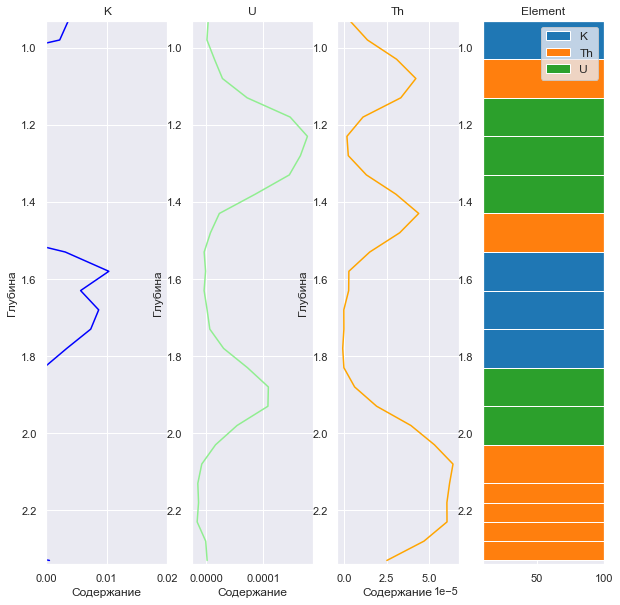

In [38]:
fig = plt.figure()
a = fig.add_subplot(1,4,1)
b = fig.add_subplot(1,4,2)
c = fig.add_subplot(1,4,3)
a.set(title = 'K')
b.set(title = 'U')
c.set(title = 'Th')

a.plot(K_s, solution_0.keys(), color = 'blue')
b.plot(U_s, solution_0.keys(), color = 'lightgreen')
c.plot(Th_s, solution_0.keys(), color = 'orange')
a.set_ylim(2.34,0.93)
#a.axvline(0)
a.set_xlim(0,0.02)
b.set_ylim(2.34,0.93)
c.set_ylim(2.34,0.93)

a.set_xlabel('Содержание')
a.set_ylabel('Глубина')

b.set_xlabel('Содержание')
b.set_ylabel('Глубина')

c.set_xlabel('Содержание')
c.set_ylabel('Глубина')


summary = fig.add_subplot(1,4,4)
summary.set_xlim(10, 100)
summary.set_ylim(2.34,0.93)
summary.broken_barh([(10, 100)], (0.93,0.1), facecolors='tab:blue')
summary.broken_barh([(10, 100)], (1.03, 0.1), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (1.13, 0.1), facecolors='tab:green')
summary.broken_barh([(10, 100)], (1.23, 0.1), facecolors='tab:green')
summary.broken_barh([(10, 100)], (1.33, 0.1), facecolors='tab:green')
summary.broken_barh([(10, 100)], (1.43, 0.1), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (1.53, 0.1), facecolors='tab:blue')
summary.broken_barh([(10, 100)], (1.63, 0.1), facecolors='tab:blue')
summary.broken_barh([(10, 100)], (1.73, 0.1), facecolors='tab:blue')
summary.broken_barh([(10, 100)], (1.83, 0.1), facecolors='tab:green')
summary.broken_barh([(10, 100)], (1.93, 0.1), facecolors='tab:green')
summary.broken_barh([(10, 100)], (2.03, 0.1), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (2.13, 0.1), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (2.18, 0.05), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (2.23, 0.05), facecolors='tab:orange')
summary.broken_barh([(10, 100)], (2.28, 0.05), facecolors='tab:orange')
summary.legend(['K', 'Th', 'U'], fontsize = 12)

summary.set(title = 'Element')
#summary.set_ylim(2.34,0.93)

plt.show()

Вывод: по графикам выше видно, что все совпадает и выглядит логично.